## ⚖️ 6. Visualize communities on cooperation-competition plot

You are now familiar with how the SMETANA global algorithm works, next we will inspect the generated output. This notebook loads the global simulation results for the different communities directly from the `/data/cooccurrence/simulation/mip_mro` subfolders. You may follow along passively on GitHub or launch the jupyter notebook from your terminal to interactively run through each code chunk. To do so, navigate to the `/SymbNET/scripts/` folder and launch jupyter from your terminal:
```bash
$ jupyter notebook --browser firefox
```
This should launch a browser window where you can click on the appropriate file to launch this notebook interactively. This script assumes that you are in the `/SymbNET/scripts` folder, and will fail to load the data if you are in the incorrect directory.

Note: this script is forked from Daniel's [cooccurrence repo](https://github.com/cdanielmachado/cooccurrence/blob/master/notebooks/Figure%201.ipynb).

In [24]:
%matplotlib inline

In [25]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
from random import sample

In [26]:
sns.set_palette('deep')

### Load simulation results

In [27]:
types = [ "gut_normal" ,"gut_impaired","gut_t2d","gut_refseq","kefir","soil"]

dfs = []
for commtype in types:
    dfi = pd.concat(pd.read_csv(filename, sep='\t', dtype={'mip': float, 'mro': float})
                    for filename in glob(f"../data/cooccurrence/simulation/mip_mro/{commtype}/*_global.tsv"))
    dfi['type'] = commtype
    dfs.append(dfi)
df = pd.concat(dfs)
df.reset_index(inplace=True)
df.dropna(inplace=True)
df["community size"] = df["size"]

df

,index,community,medium,size,mip,mro,type,community size
0,0,sim_47,complete,5,9.0,0.704819,gut_normal,5
1,1,sim_87,complete,5,9.0,0.704819,gut_normal,5
2,2,sim_82,complete,5,9.0,0.704819,gut_normal,5
3,3,sim_68,complete,5,9.0,0.704819,gut_normal,5
4,4,sim_54,complete,5,7.0,0.680723,gut_normal,5
...,...,...,...,...,...,...,...,...
720,95,sim_24,complete,5,14.0,0.578947,soil,5
721,96,sim_63,complete,5,15.0,0.598958,soil,5
722,97,sim_56,complete,5,16.0,0.589474,soil,5
723,98,sim_25,complete,5,15.0,0.557292,soil,5


### Plot

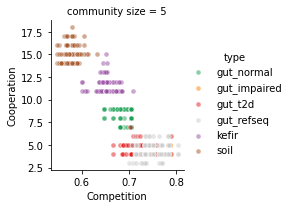

In [28]:
sizes = [5]
subdf = df[df["size"].isin(sizes)].copy()
subdf["Competition"] = subdf["mro"]
subdf["Cooperation"] = subdf["mip"]

palette = {"gut_normal": '#1ba055', "gut_impaired": '#ff7f00', "gut_t2d": '#e41a1c', "gut_refseq": '#cccccc',"kefir":'#984ea3',"soil":'#a65628'}

g = sns.FacetGrid(subdf, col="community size", hue="type", height=3,hue_order=types, palette=palette)
g.map(plt.scatter, "Competition", "Cooperation", alpha=0.5, s=25, linewidths=0.7, edgecolors='w');
g.add_legend()
g.savefig("../plots/global_polarization/mip_mro.png", dpi=300)

## 🍾 You have completed the core of this tutorial, move on to [the discussion](https://github.com/franciscozorrilla/SymbNET/blob/main/scripts/9.wrap_up_discussion.md) or continue below for optional bonus exercises 👇

In this tutorial we only considered communities of size 5, lets see how communities polarize at larger sizes. We can also plot our simulation results against the plot generated in the [original plublication](https://www.nature.com/articles/s41559-020-01353-4/figures/1).

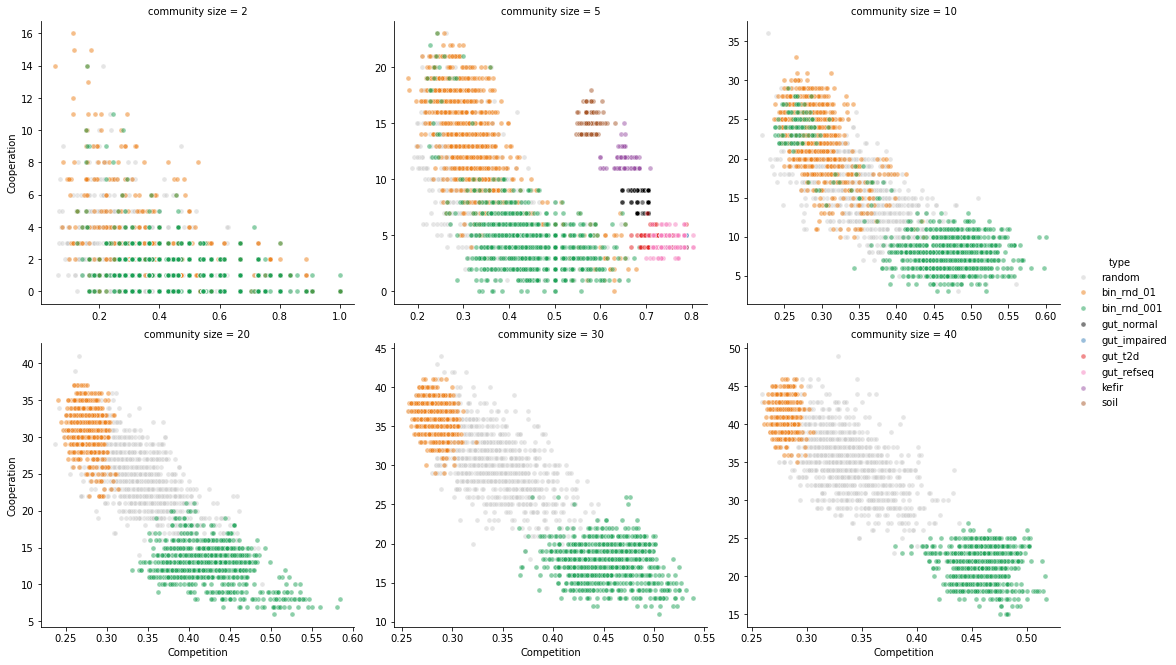

In [29]:
types = ["random", "bin_rnd_01", "bin_rnd_001", "gut_normal" ,"gut_impaired","gut_t2d","gut_refseq","kefir","soil"]

dfs = []
for commtype in types:
    dfi = pd.concat(pd.read_csv(filename, sep='\t', dtype={'mip': float, 'mro': float})
                    for filename in glob(f"../data/cooccurrence/simulation/mip_mro/{commtype}/*_global.tsv"))
    dfi['type'] = commtype
    dfs.append(dfi)
df = pd.concat(dfs)
df.reset_index(inplace=True)
df.dropna(inplace=True)
df["community size"] = df["size"]
df

sizes = [2,5,10,20,30,40]
subdf = df[df["size"].isin(sizes)].copy()
subdf["Competition"] = subdf["mro"]
subdf["Cooperation"] = subdf["mip"]

palette = {"random": '#cccccc', "bin_rnd_01": '#ed7e17', "bin_rnd_001": '#1ba055', "gut_normal": '#000',"gut_impaired":'#377eb8',"gut_t2d":'#e41a1c',"gut_refseq":'#f781bf',"kefir": '#984ea3',"soil": '#a65628'}
g = sns.FacetGrid(subdf, col="community size", hue="type", height=5,hue_order=types, palette=palette, col_wrap=3, sharex=False, sharey=False)
g.map(plt.scatter, "Competition", "Cooperation", alpha=0.5, s=25, linewidths=0.7, edgecolors='w');
g.fig.subplots_adjust(top=0.9)
g.add_legend()
g.savefig("../plots/global_polarization/mip_mro_background.png", dpi=300)


Additonally, we can recreate the remaining two panels in this figure from the publication showing how cooperation and competition scores vary with community size.

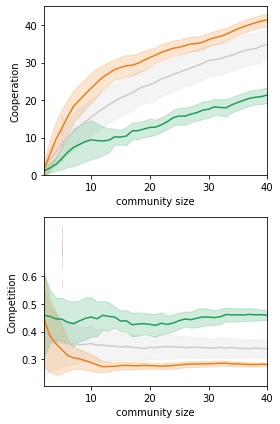

In [30]:
f, axs = plt.subplots(2,1, figsize=(4,6))
sns.lineplot(data=df, x="community size", y="mip", hue="type", ci="sd", palette=palette, legend=False, ax=axs[0])
sns.lineplot(data=df, x="community size", y="mro", hue="type", ci="sd", palette=palette, legend=False, ax=axs[1])

axs[0].set_xlim(2,40)
axs[0].set_ylim(0,45)
axs[0].set_ylabel("Cooperation")
axs[0].set_yticks([0, 10, 20, 30, 40])

axs[1].set_xlim(2,40)
axs[1].set_ylabel("Competition")
axs[1].set_yticks([0.3, 0.4, 0.5, 0.6])
plt.tight_layout()

plt.savefig("../plots/global_polarization/cooccurrence_plots.png", dpi=300)

## Move on to [optional exercise 7](https://github.com/franciscozorrilla/SymbNET/blob/main/scripts/7.generate_ensemble_models.md)